In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

In [2]:
kidney= pd.read_csv('Chronic_Kidney_Dsease_data.csv')

In [3]:
kidney.shape

(1659, 54)

In [4]:
kidney.head()

,PatientID,Age,Gender,Ethnicity,SocioeconomicStatus,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,...,Itching,QualityOfLifeScore,HeavyMetalsExposure,OccupationalExposureChemicals,WaterQuality,MedicalCheckupsFrequency,MedicationAdherence,HealthLiteracy,Diagnosis,DoctorInCharge
0,1,71,0,0,0,2,31.069414,1,5.128112,1.676220,...,7.556302,76.076800,0,0,1,1.018824,4.966808,9.871449,1,Confidential
1,2,34,0,0,1,3,29.692119,1,18.609552,8.377574,...,6.836766,40.128498,0,0,0,3.923538,8.189275,7.161765,1,Confidential
2,3,80,1,1,0,1,37.394822,1,11.882429,9.607401,...,2.144722,92.872842,0,1,1,1.429906,7.624028,7.354632,1,Confidential
3,4,40,0,2,0,1,31.329680,0,16.020165,0.408871,...,7.077188,90.080321,0,0,0,3.226416,3.282688,6.629587,1,Confidential
4,5,43,0,1,1,2,23.726311,0,7.944146,0.780319,...,3.553118,5.258372,0,0,1,0.285466,3.849498,1.437385,1,Confidential


In [5]:
kidney.tail()

,PatientID,Age,Gender,Ethnicity,SocioeconomicStatus,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,...,Itching,QualityOfLifeScore,HeavyMetalsExposure,OccupationalExposureChemicals,WaterQuality,MedicalCheckupsFrequency,MedicationAdherence,HealthLiteracy,Diagnosis,DoctorInCharge
1654,1655,90,0,0,1,2,39.677059,1,1.370151,4.157954,...,2.138976,81.102765,0,0,0,0.951836,9.547583,2.046212,0,Confidential
1655,1656,34,0,0,2,1,28.922015,0,3.372073,9.647525,...,7.911566,10.600428,0,1,0,3.604147,1.609847,0.324417,0,Confidential
1656,1657,84,0,0,2,3,21.951219,0,15.825955,7.349964,...,0.015531,69.633427,0,0,0,0.801955,5.768617,4.935108,0,Confidential
1657,1658,90,0,0,2,2,24.964149,0,12.967462,0.618614,...,3.432765,31.858023,0,0,0,0.560298,2.744519,0.322592,1,Confidential
1658,1659,34,1,1,0,0,19.253258,1,11.396510,7.446314,...,9.293499,82.314878,0,0,0,1.754852,0.186400,4.553608,1,Confidential


In [6]:
kidney.sample(15)

,PatientID,Age,Gender,Ethnicity,SocioeconomicStatus,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,...,Itching,QualityOfLifeScore,HeavyMetalsExposure,OccupationalExposureChemicals,WaterQuality,MedicalCheckupsFrequency,MedicationAdherence,HealthLiteracy,Diagnosis,DoctorInCharge
1395,1396,46,1,0,2,0,30.155056,0,18.087537,5.385089,...,4.538553,38.505800,0,0,0,0.817118,2.919470,7.188348,0,Confidential
1497,1498,80,1,0,1,2,39.115571,0,19.364561,0.268479,...,6.330765,28.262205,0,0,0,2.752424,0.119387,7.324409,1,Confidential
705,706,36,0,0,1,2,32.632666,1,13.286697,1.608535,...,9.770740,54.168058,0,0,0,3.443116,2.451353,9.395224,1,Confidential
941,942,48,1,0,0,3,26.069124,1,9.276687,8.444230,...,7.819926,86.189131,0,0,0,3.262031,3.547418,6.228785,1,Confidential
911,912,74,1,1,0,2,34.275959,1,16.080456,5.727552,...,3.814648,90.814437,0,0,1,2.180880,8.117388,8.521674,1,Confidential
727,728,89,1,0,2,3,21.246345,0,14.860038,9.898414,...,6.814620,89.231764,0,0,1,3.488862,7.505870,5.643896,1,Confidential
666,667,89,1,0,2,2,34.082690,1,4.892253,6.217172,...,4.679243,14.119128,0,0,0,2.882352,1.150407,0.717576,0,Confidential
1140,1141,33,1,0,1,3,27.430060,0,8.586401,6.372798,...,1.180127,34.772854,0,0,1,0.340203,6.850006,5.754183,0,Confidential
301,302,32,1,0,2,3,37.173553,0,5.878455,4.946359,...,1.813236,0.510300,0,0,0,3.291217,2.543817,2.525044,1,Confidential
1619,1620,74,1,3,2,2,35.125372,0,4.591746,4.401304,...,8.922131,59.955095,1,0,1,3.045696,7.589322,9.594996,0,Confidential


In [7]:
kidney.columns

Index(['PatientID', 'Age', 'Gender', 'Ethnicity', 'SocioeconomicStatus',
       'EducationLevel', 'BMI', 'Smoking', 'AlcoholConsumption',
       'PhysicalActivity', 'DietQuality', 'SleepQuality',
       'FamilyHistoryKidneyDisease', 'FamilyHistoryHypertension',
       'FamilyHistoryDiabetes', 'PreviousAcuteKidneyInjury',
       'UrinaryTractInfections', 'SystolicBP', 'DiastolicBP',
       'FastingBloodSugar', 'HbA1c', 'SerumCreatinine', 'BUNLevels', 'GFR',
       'ProteinInUrine', 'ACR', 'SerumElectrolytesSodium',
       'SerumElectrolytesPotassium', 'SerumElectrolytesCalcium',
       'SerumElectrolytesPhosphorus', 'HemoglobinLevels', 'CholesterolTotal',
       'CholesterolLDL', 'CholesterolHDL', 'CholesterolTriglycerides',
       'ACEInhibitors', 'Diuretics', 'NSAIDsUse', 'Statins',
       'AntidiabeticMedications', 'Edema', 'FatigueLevels', 'NauseaVomiting',
       'MuscleCramps', 'Itching', 'QualityOfLifeScore', 'HeavyMetalsExposure',
       'OccupationalExposureChemicals', 'WaterQu

In [8]:
kidney.dtypes

PatientID                          int64
Age                                int64
Gender                             int64
Ethnicity                          int64
SocioeconomicStatus                int64
EducationLevel                     int64
BMI                              float64
Smoking                            int64
AlcoholConsumption               float64
PhysicalActivity                 float64
DietQuality                      float64
SleepQuality                     float64
FamilyHistoryKidneyDisease         int64
FamilyHistoryHypertension          int64
FamilyHistoryDiabetes              int64
PreviousAcuteKidneyInjury          int64
UrinaryTractInfections             int64
SystolicBP                         int64
DiastolicBP                        int64
FastingBloodSugar                float64
HbA1c                            float64
SerumCreatinine                  float64
BUNLevels                        float64
GFR                              float64
ProteinInUrine  

In [9]:
kidney.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1659 entries, 0 to 1658
Data columns (total 54 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   PatientID                      1659 non-null   int64  
 1   Age                            1659 non-null   int64  
 2   Gender                         1659 non-null   int64  
 3   Ethnicity                      1659 non-null   int64  
 4   SocioeconomicStatus            1659 non-null   int64  
 5   EducationLevel                 1659 non-null   int64  
 6   BMI                            1659 non-null   float64
 7   Smoking                        1659 non-null   int64  
 8   AlcoholConsumption             1659 non-null   float64
 9   PhysicalActivity               1659 non-null   float64
 10  DietQuality                    1659 non-null   float64
 11  SleepQuality                   1659 non-null   float64
 12  FamilyHistoryKidneyDisease     1659 non-null   i

In [10]:
kidney.describe()

,PatientID,Age,Gender,Ethnicity,SocioeconomicStatus,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,...,MuscleCramps,Itching,QualityOfLifeScore,HeavyMetalsExposure,OccupationalExposureChemicals,WaterQuality,MedicalCheckupsFrequency,MedicationAdherence,HealthLiteracy,Diagnosis
count,1659.000000,1659.000000,1659.000000,1659.00000,1659.000000,1659.000000,1659.000000,1659.000000,1659.000000,1659.000000,...,1659.000000,1659.000000,1659.000000,1659.000000,1659.000000,1659.000000,1659.000000,1659.000000,1659.000000,1659.000000
mean,830.000000,54.441230,0.515371,0.71308,0.977697,1.693189,27.620049,0.292948,9.969831,5.024247,...,3.525510,5.054869,49.730659,0.044002,0.103074,0.197107,2.000336,4.947788,5.144973,0.918626
std,479.056364,20.549757,0.499914,1.00043,0.776686,0.910611,7.288670,0.455252,5.798787,2.866274,...,2.026131,2.880460,27.827593,0.205162,0.304147,0.397934,1.141635,2.869959,2.901138,0.273492
min,1.000000,20.000000,0.000000,0.00000,0.000000,0.000000,15.033888,0.000000,0.021740,0.001186,...,0.006327,0.013697,0.087256,0.000000,0.000000,0.000000,0.001082,0.005392,0.004436,0.000000
25%,415.500000,36.000000,0.000000,0.00000,0.000000,1.000000,21.471449,0.000000,5.051156,2.555038,...,1.820793,2.532867,26.991708,0.000000,0.000000,0.000000,1.005802,2.498119,2.569561,1.000000
50%,830.000000,54.000000,1.000000,0.00000,1.000000,2.000000,27.652077,0.000000,9.951503,5.072395,...,3.572522,5.087086,48.970075,0.000000,0.000000,0.000000,2.040635,4.974069,5.182949,1.000000
75%,1244.500000,72.000000,1.000000,1.00000,2.000000,2.000000,34.015849,1.000000,14.967100,7.460563,...,5.254956,7.552093,73.913997,0.000000,0.000000,0.000000,2.947213,7.499783,7.733253,1.000000
max,1659.000000,90.000000,1.000000,3.00000,2.000000,3.000000,39.993532,1.000000,19.992713,9.998167,...,6.984636,9.998313,99.987510,1.000000,1.000000,1.000000,3.999469,9.992345,9.993754,1.000000


In [11]:
kidney=kidney.drop(columns='PatientID',axis=1)
kidney=kidney.drop(columns='DoctorInCharge',axis=1)


In [12]:
kidney.shape

(1659, 52)

In [13]:
kidney= kidney.drop_duplicates()
kidney.shape

(1659, 52)

In [14]:
print(kidney.isnull())

        Age  Gender  Ethnicity  SocioeconomicStatus  EducationLevel    BMI  \
0     False   False      False                False           False  False   
1     False   False      False                False           False  False   
2     False   False      False                False           False  False   
3     False   False      False                False           False  False   
4     False   False      False                False           False  False   
...     ...     ...        ...                  ...             ...    ...   
1654  False   False      False                False           False  False   
1655  False   False      False                False           False  False   
1656  False   False      False                False           False  False   
1657  False   False      False                False           False  False   
1658  False   False      False                False           False  False   

      Smoking  AlcoholConsumption  PhysicalActivity  DietQualit

<Axes: >

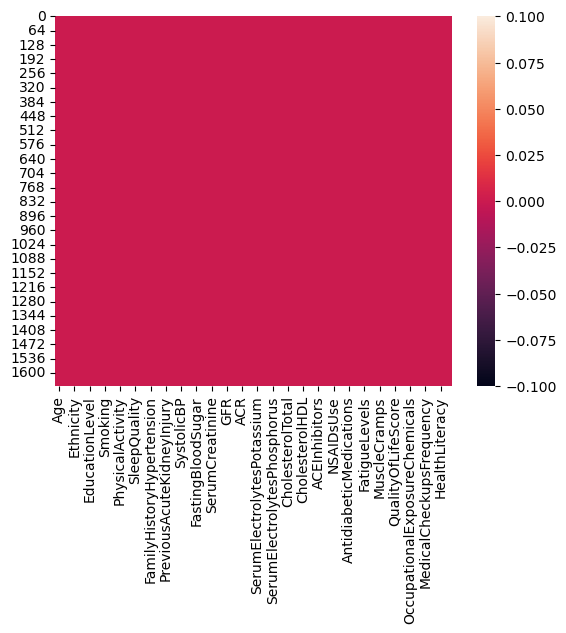

In [15]:
sns.heatmap(kidney.isnull())

In [16]:
kidney.isnull().sum()

Age                              0
Gender                           0
Ethnicity                        0
SocioeconomicStatus              0
EducationLevel                   0
BMI                              0
Smoking                          0
AlcoholConsumption               0
PhysicalActivity                 0
DietQuality                      0
SleepQuality                     0
FamilyHistoryKidneyDisease       0
FamilyHistoryHypertension        0
FamilyHistoryDiabetes            0
PreviousAcuteKidneyInjury        0
UrinaryTractInfections           0
SystolicBP                       0
DiastolicBP                      0
FastingBloodSugar                0
HbA1c                            0
SerumCreatinine                  0
BUNLevels                        0
GFR                              0
ProteinInUrine                   0
ACR                              0
SerumElectrolytesSodium          0
SerumElectrolytesPotassium       0
SerumElectrolytesCalcium         0
SerumElectrolytesPho

In [17]:
kidney.describe()

,Age,Gender,Ethnicity,SocioeconomicStatus,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,...,MuscleCramps,Itching,QualityOfLifeScore,HeavyMetalsExposure,OccupationalExposureChemicals,WaterQuality,MedicalCheckupsFrequency,MedicationAdherence,HealthLiteracy,Diagnosis
count,1659.000000,1659.000000,1659.00000,1659.000000,1659.000000,1659.000000,1659.000000,1659.000000,1659.000000,1659.000000,...,1659.000000,1659.000000,1659.000000,1659.000000,1659.000000,1659.000000,1659.000000,1659.000000,1659.000000,1659.000000
mean,54.441230,0.515371,0.71308,0.977697,1.693189,27.620049,0.292948,9.969831,5.024247,5.028544,...,3.525510,5.054869,49.730659,0.044002,0.103074,0.197107,2.000336,4.947788,5.144973,0.918626
std,20.549757,0.499914,1.00043,0.776686,0.910611,7.288670,0.455252,5.798787,2.866274,2.865777,...,2.026131,2.880460,27.827593,0.205162,0.304147,0.397934,1.141635,2.869959,2.901138,0.273492
min,20.000000,0.000000,0.00000,0.000000,0.000000,15.033888,0.000000,0.021740,0.001186,0.002407,...,0.006327,0.013697,0.087256,0.000000,0.000000,0.000000,0.001082,0.005392,0.004436,0.000000
25%,36.000000,0.000000,0.00000,0.000000,1.000000,21.471449,0.000000,5.051156,2.555038,2.558443,...,1.820793,2.532867,26.991708,0.000000,0.000000,0.000000,1.005802,2.498119,2.569561,1.000000
50%,54.000000,1.000000,0.00000,1.000000,2.000000,27.652077,0.000000,9.951503,5.072395,4.989810,...,3.572522,5.087086,48.970075,0.000000,0.000000,0.000000,2.040635,4.974069,5.182949,1.000000
75%,72.000000,1.000000,1.00000,2.000000,2.000000,34.015849,1.000000,14.967100,7.460563,7.428290,...,5.254956,7.552093,73.913997,0.000000,0.000000,0.000000,2.947213,7.499783,7.733253,1.000000
max,90.000000,1.000000,3.00000,2.000000,3.000000,39.993532,1.000000,19.992713,9.998167,9.998927,...,6.984636,9.998313,99.987510,1.000000,1.000000,1.000000,3.999469,9.992345,9.993754,1.000000


Text(0.5, 1.0, 'Outcome')

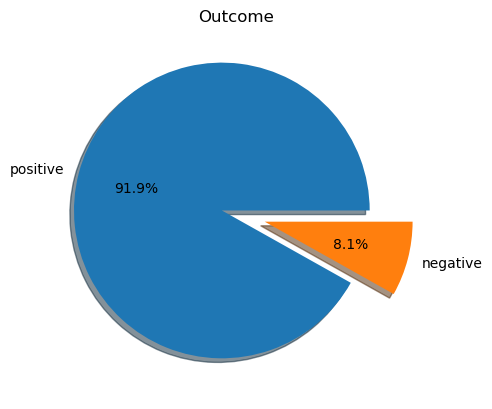

In [18]:
mylable= ['positive','negative']
plt.pie(kidney['Diagnosis'].value_counts(),explode=[0.1,0.2], labels=mylable , autopct='%1.1f%%', shadow=True)
plt.title('Outcome') 

[Text(0.5, 1.0, 'Diagnosis')]

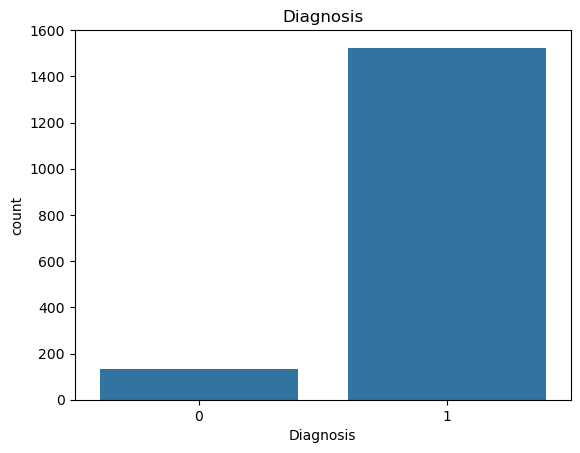

In [19]:
sns.countplot(x='Diagnosis' , data=kidney).set(title='Diagnosis')


In [20]:
x= kidney.drop(columns='Diagnosis',axis=1)
y= kidney['Diagnosis']

In [21]:
print(x)

      Age  Gender  Ethnicity  SocioeconomicStatus  EducationLevel        BMI  \
0      71       0          0                    0               2  31.069414   
1      34       0          0                    1               3  29.692119   
2      80       1          1                    0               1  37.394822   
3      40       0          2                    0               1  31.329680   
4      43       0          1                    1               2  23.726311   
...   ...     ...        ...                  ...             ...        ...   
1654   90       0          0                    1               2  39.677059   
1655   34       0          0                    2               1  28.922015   
1656   84       0          0                    2               3  21.951219   
1657   90       0          0                    2               2  24.964149   
1658   34       1          1                    0               0  19.253258   

      Smoking  AlcoholConsumption  Phys

In [22]:
print(y)

0       1
1       1
2       1
3       1
4       1
       ..
1654    0
1655    0
1656    0
1657    1
1658    1
Name: Diagnosis, Length: 1659, dtype: int64


In [23]:
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2)

In [24]:
print(x.shape,x_train.shape,x_test.shape)

(1659, 51) (1327, 51) (332, 51)


In [25]:
print(y.shape,y_train.shape,y_test.shape)

(1659,) (1327,) (332,)


In [26]:
model= LogisticRegression()
model.fit(x_train,y_train)

c:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [27]:
prediction= model.predict(x_test)
print(prediction)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1
 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [28]:
accuracy= accuracy_score(prediction,y_test)
print(accuracy)

0.9216867469879518


In [29]:
import pickle
pickle.dump(model,open('kidney.pkl','wb'))